In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Look at the Data-points

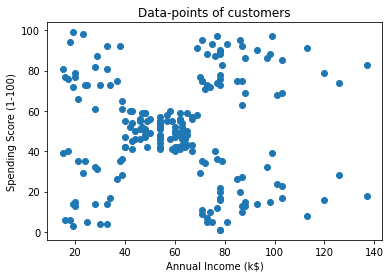

In [4]:
mtp.scatter(dataset['Annual Income (k$)'],dataset['Spending Score (1-100)'])
mtp.title('Data-points of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')   
mtp.show()

In [5]:
x = dataset.iloc[:,[3,4]].values

## Calculate the value for K
We use the Elbow in the Withing Clusters Sum of Squares Vs K Graph as the best K.

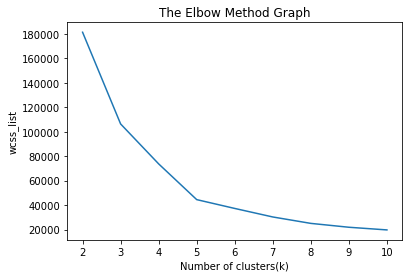

In [6]:
from sklearn.cluster import KMeans  
from sklearn.metrics import silhouette_score,calinski_harabasz_score
wcss_list= []  #Initializing the list for the values of WCSS  
silhouettes = []
c_h_index = []
#Using for loop for iterations from 1 to 10.  
for i in range(2, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42).fit(x)  
    labels = kmeans.labels_
    silhouettes.append(silhouette_score(x,labels,metric='euclidean'))
    c_h_index.append(calinski_harabasz_score(x,labels))
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(2, 11), wcss_list)  
mtp.title('The Elbow Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  

## Silhouette Score 
We use Silhouette Score to verify the K selected, Higher the score better the clustering


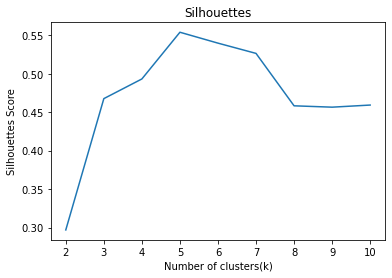

In [7]:
mtp.plot(range(2, 11), silhouettes)  
mtp.title('Silhouettes')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('Silhouettes Score')  
mtp.show()  

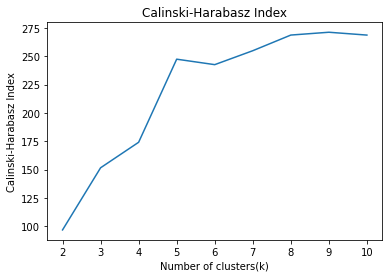

In [8]:
mtp.plot(range(2, 11), c_h_index)  
mtp.title('Calinski-Harabasz Index')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('Calinski-Harabasz Index')  
mtp.show() 

Documentation [SkLearn Kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

1. init (random -> Basic or kmeans++ -> Better approach)
2. algorithm ('lloyd' -> Basic, 'elkan' -> Faster approach)

In [9]:
# Actual Model Training
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x) 

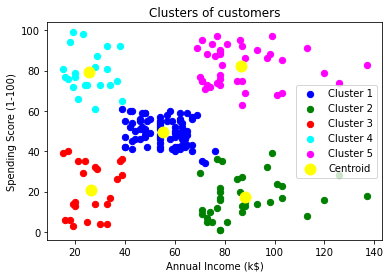

In [10]:
#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 40, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 40, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 40, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4') #for fourth cluster  
mtp.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 40, c = 'magenta', label = 'Cluster 5') #for fifth cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 120, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  

## Calinski-Harabasz Index